<a href="https://colab.research.google.com/github/ZHAbotorabi/Testing-Models/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B Testing** Sample!
Here's a complete Colab structure that will guide you through the process of A/B testing using simulated data. This notebook will include steps for simulating data, calculating conversion rates, performing a t-test, and interpreting the results.

## Explanation of Each Step:
1. Import Libraries: We use numpy for data simulation, scipy.stats for the t-test, and matplotlib.pyplot for visualization.

2. Simulate Data: We simulate conversion outcomes using the np.random.binomial function for both versions (A and B) with different conversion rates (15% for A, 18% for B).

3. Calculate Conversion Rates: We calculate the actual conversion rate for each version by taking the mean of the simulated binary outcomes.

4. Visualize the Results: A bar chart visually compares the conversion rates of both versions, helping you quickly see any apparent differences.

5. Perform Statistical Test: We use a two-sample t-test to check if the difference in conversion rates between Version A and Version B is statistically significant.

6. Interpret Results: Based on the p-value from the t-test, we conclude whether the difference is significant at a 5% significance level (alpha = 0.05).

7. Calculate Lift (Optional): Lift is the percentage increase in conversions that Version B has over Version A. It can be useful in understanding the practical impact of the difference.

In [1]:
# A/B Testing in Python: Google Colab Notebook
# This notebook will guide you through the A/B testing process using simulated data.

# Step 1: Import Necessary Libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Binary Outcomes Explained in A/B Testing
When we say "binary outcomes," we are referring to an experiment or event that can have only two possible results. In the case of A/B testing for website conversions, the two outcomes are:

- **1 (Conversion)**: This indicates that the user signed up or completed the desired action (e.g., clicking a button, making a purchase, etc.).
- **0 (No Conversion)**: This indicates that the user did not sign up or did not complete the desired action.

## Why Use Binary Outcomes?

In many A/B tests, we want to track whether a user takes a specific action, such as signing up for an account, clicking a link, or making a purchase. These are often "yes" or "no" actions, meaning that there are only two possible outcomes:

- **Success (Conversion)**: The user performs the desired action.
- **Failure (No Conversion)**: The user does not perform the desired action.

This makes it a binary outcome, where each trial (or user interaction) has only two possible outcomes.

## How We Simulate Binary Outcomes

In A/B testing, we often simulate or record these outcomes using a **binomial distribution**. The binomial distribution is used because we are dealing with a series of independent trials (user visits) where each trial has two possible outcomes (conversion or no conversion), and each trial has the same probability of success (conversion rate).

In your case:

- **Conversion rate for Version A** might be 15%, meaning 15% of users who visit Version A of the webpage will convert (sign up).
- **Conversion rate for Version B** might be 18%, meaning 18% of users who visit Version B will convert.

Each user is independently either a success (conversion = 1) or a failure (no conversion = 0), with a certain probability of success based on the conversion rate.

## Simulating Binary Outcomes Using Python

We simulate this with the `numpy.random.binomial` function. Here's how it works:

```python
# Simulate data: Let's assume we have 1000 visitors to each version of the webpage
# For simplicity, we simulate binary outcomes: 1 for conversion (user signed up), 0 for no conversion (user did not sign up)

conversion_rate_a = 0.15
n = 1000  # Number of users
version_a_conversions = np.random.binomial(1, conversion_rate_a, n)


In [9]:
# Version A: 1000 users, with a 15% conversion rate
np.random.seed(42)  # For reproducibility
version_a_conversions = np.random.binomial(1, 0.15, 1000)

In [2]:
# Step 2: Simulate Data for A/B Test
# Define the parameters for each version
n = 1000  # Number of users per group
conversion_rate_a = 0.15  # Conversion rate for Version A (15%)
conversion_rate_b = 0.18  # Conversion rate for Version B (18%)

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate conversion outcomes for Version A and Version B
version_a_conversions = np.random.binomial(1, conversion_rate_a, n)
version_b_conversions = np.random.binomial(1, conversion_rate_b, n)


In [3]:
# Step 3: Calculate Conversion Rates
conversion_rate_a_actual = np.mean(version_a_conversions)
conversion_rate_b_actual = np.mean(version_b_conversions)

print(f"Conversion rate for Version A: {conversion_rate_a_actual:.2%}")
print(f"Conversion rate for Version B: {conversion_rate_b_actual:.2%}")

Conversion rate for Version A: 15.30%
Conversion rate for Version B: 17.80%


# Step 4: Visualize the Results
# Create a bar chart to compare the conversion rates visually
labels = ['Version A', 'Version B']
conversion_rates = [conversion_rate_a_actual, conversion_rate_b_actual]

plt.bar(labels, conversion_rates, color=['blue', 'green'])
plt.xlabel('Version')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison')
plt.ylim(0, 0.3)  # Set y-axis limit for better visualization
plt.show()

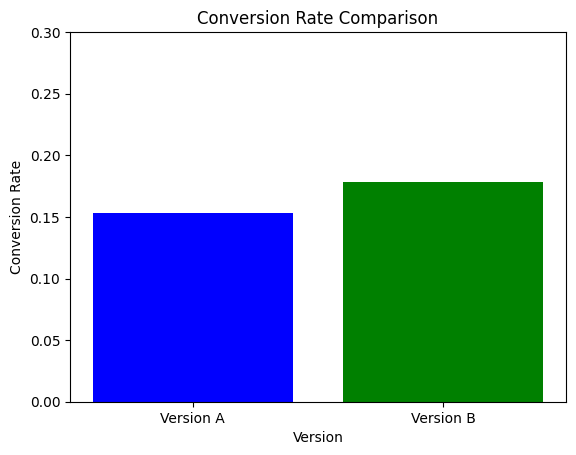

In [4]:
# Step 4: Visualize the Results
# Create a bar chart to compare the conversion rates visually
labels = ['Version A', 'Version B']
conversion_rates = [conversion_rate_a_actual, conversion_rate_b_actual]

plt.bar(labels, conversion_rates, color=['blue', 'green'])
plt.xlabel('Version')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison')
plt.ylim(0, 0.3)  # Set y-axis limit for better visualization
plt.show()

In [5]:
# Step 5: Perform Statistical Test
# Use a two-sample t-test to determine if there is a statistically significant difference
t_stat, p_value = stats.ttest_ind(version_a_conversions, version_b_conversions)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.50
P-value: 0.1327


In [6]:
# Step 6: Interpret the Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
    print("Version B is likely to perform better than Version A.")
else:
    print("The difference in conversion rates is not statistically significant.")
    print("We do not have enough evidence to say Version B performs better.")

The difference in conversion rates is not statistically significant.
We do not have enough evidence to say Version B performs better.


In [7]:
# Optional: Step 7 - Calculate the Lift in Conversion Rate
# The "lift" represents the percentage increase in conversions from Version A to Version B
lift = (conversion_rate_b_actual - conversion_rate_a_actual) / conversion_rate_a_actual
print(f"Lift: {lift:.2%}")

Lift: 16.34%


## Usage Notes
* Adjust Parameters: Feel free to change n, conversion_rate_a, and conversion_rate_b to explore different scenarios.

* Interpretation: The significance of the results depends on the p-value. A low p-value (e.g., less than 0.05) suggests that the difference in conversion rates is likely not due to random chance.

This notebook provides a simple but effective framework for running A/B tests and interpreting their results. Let me know if you’d like additional features or modifications!

# Understanding the T-Test in A/B Testing

The **t-test** is a statistical method used to compare the means of two groups to determine if there is a statistically significant difference between them. In A/B testing, the t-test is useful when we want to compare the performance of two versions (e.g., Version A and Version B) based on a continuous outcome, like conversion rates or average time on a webpage.

### Types of T-Tests
1. **Independent Samples t-test (Two-Sample t-test)**:
   - Used to compare the means of two independent groups (e.g., two different groups of users who saw Version A and Version B).
   
2. **Paired Sample t-test (Dependent t-test)**:
   - Used to compare two related sets of observations, often from the same group measured at different times (e.g., user satisfaction before and after a change).

3. **One-Sample t-test**:
   - Used to compare the mean of a single group against a known value or population mean (e.g., testing if the average time on page meets an industry standard).

### Steps in Conducting a T-Test
For an **independent samples t-test** comparing two groups (e.g., conversion rates of Version A and Version B):

1. **Set Up Hypotheses**:
   - **Null Hypothesis (H₀)**: The means of the two groups are equal (no difference in conversion rates).
   - **Alternative Hypothesis (H₁)**: The means of the two groups are different (there is a difference in conversion rates).

2. **Calculate the T-Statistic**:
   - The t-statistic is calculated as:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$
     where:
*  $\bar{X}_1$ and $\bar{X}_2$ are the means of the two groups.
* $s_1^2$ and $s_2^2$ are the variances of the two groups.
* $n_1$ and $n_2$ are the sample sizes of the two groups.
  

3. **Determine the p-value**:
   - The p-value indicates the probability that the observed difference in means occurred by chance.
   - If the **p-value is less than a chosen significance level** (often 0.05), we reject the null hypothesis, suggesting that the difference is statistically significant.

4. **Interpret the Results**:
   - **If p-value < 0.05**: The difference between the means is statistically significant, and we reject the null hypothesis.
   - **If p-value ≥ 0.05**: We fail to reject the null hypothesis, meaning there is no statistically significant difference between the two groups.


# Applying the T-Test in A/B Testing

In this section, we will apply the **t-test** to compare the means of two different versions (Version A and Version B) based on some simulated conversion rates. The **t-test** helps us determine if there is a significant difference between the two versions in terms of their performance (e.g., conversion rate).

### Example Scenario

Imagine we are testing two different webpage versions (Version A and Version B) and we want to see if there is a significant difference in the conversion rates. The conversion data for 10 users in each version is as follows:

- **Version A**: Conversion rates `[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]`
- **Version B**: Conversion rates `[1, 1, 0, 1, 1, 1, 1, 0, 1, 1]`

### Step 1: Set Up Hypotheses

- **Null Hypothesis (H₀)**: The means of the two versions are equal (no significant difference in conversion rates between Version A and Version B).
- **Alternative Hypothesis (H₁)**: The means of the two versions are different (there is a significant difference in conversion rates between Version A and Version B).

### Step 2: Calculate the T-Statistic

The t-statistic is calculated using the following formula:

$$
t = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

Where:
- $\bar{X}_A$ and $\bar{X}_B$ are the means of Version A and Version B.
- $s_A^2$ and $s_B^2$ are the sample variances of Version A and Version B.
- $n_A$ and $n_B$ are the sample sizes of Version A and Version B.

#### 2.1. Compute the Means of Each Group

- **Mean of Version A**:
  $$ \bar{X}_A = \frac{0 + 1 + 0 + 1 + 0 + 1 + 1 + 0 + 1 + 0}{10} = 0.5 $$

- **Mean of Version B**:
  $$ \bar{X}_B = \frac{1 + 1 + 0 + 1 + 1 + 1 + 1 + 0 + 1 + 1}{10} = 0.8 $$

#### 2.2. Compute the Sample Variances for Each Group

- **Variance of Version A ($s_A^2$)**:  
  $$ s_A^2 = \frac{\sum (X_A - \bar{X}_A)^2}{n_A - 1} $$  
  For Version A, we calculate the squared deviations from the mean and then compute the variance. The variance will turn out to be $0.25$.

- **Variance of Version B ($s_B^2$)**:  
  $$ s_B^2 = \frac{\sum (X_B - \bar{X}_B)^2}{n_B - 1} $$  
  For Version B, we similarly calculate the squared deviations and the variance, which will be $0.2$.

#### 2.3. Calculate the Standard Error of the Difference Between the Means

$$
SE = \sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}
$$

Substituting the values:
$$
SE = \sqrt{\frac{0.25}{10} + \frac{0.2}{10}} = \sqrt{0.025 + 0.02} = \sqrt{0.045} \approx 0.212
$$

#### 2.4. Compute the T-Statistic

Substituting the values into the t-statistic formula:

$$
t = \frac{0.5 - 0.8}{0.212} = \frac{-0.3}{0.212} \approx -1.42
$$

### Step 3: Determine the P-Value

To determine the **p-value**, we need to find the probability of observing a t-statistic as extreme as $-1.42$ (or more extreme) under the null hypothesis. Using a **t-distribution** table or software, we can find the p-value for $t = -1.42$ with degrees of freedom $df = n_A + n_B - 2 = 10 + 10 - 2 = 18$.

For a two-tailed test, the p-value is approximately $0.175$.

### Step 4: Interpret the Results

- **If p-value < 0.05**: Reject the null hypothesis. There is a significant difference between the two versions.
- **If p-value >= 0.05**: Fail to reject the null hypothesis. There is no significant difference between the two versions.

In our case, since the **p-value** is $0.175$, which is greater than $0.05$, we **fail to reject the null hypothesis**. Therefore, there is **no significant difference** between the conversion rates of Version A and Version B.


## Conclusion

* Using the t-test, we have determined that, based on our data, there is no significant difference between the two versions' conversion rates. This means we cannot conclude that one version outperforms the other based on this data set.
